# Shorts & TikTok Trends 2025

**Dataset:** `youtube_shorts_tiktok_trends_2025.csv`

## Highlights
- Schema cleaned and validated with basic fixes
- Feature engineering: engagement metrics, time buckets, creator tiers
- Coverage matrix: Country × Platform
- Time-series views: monthly momentum and cumulative curves
- Distribution analyses with log scaling where appropriate
- Leaderboards: top creators and top hashtags
- Pareto (80/20) analysis for views concentration
- Cross-sections: device, upload hour, category, language, season, trend types


# Setup & Import Data


In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from IPython.display import display

# === Visualization Style Defaults ===
plt.style.use("seaborn-v0_8")
sns.set_theme(style="whitegrid")
sns.set_palette("Set2")

plt.rcParams.update({
    "figure.figsize": (12, 6),
    "axes.grid": True,
    "axes.spines.top": False,
    "axes.spines.right": False
})

# Quick Plotting Helpers
def quick_bar(x, y, title, xlabel=None, ylabel=None, rotation=0):
    """Bar plot with consistent style."""
    plt.figure()
    plt.bar(x, y)
    plt.title(title)
    if xlabel: plt.xlabel(xlabel)
    if ylabel: plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()

def quick_line(x, y, title, xlabel=None, ylabel=None):
    """Line plot with markers and clean layout."""
    plt.figure()
    plt.plot(x, y, marker="o")
    plt.title(title)
    if xlabel: plt.xlabel(xlabel)
    if ylabel: plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

def quick_hist(series, bins=50, title="", xlabel=None, logx=False, logy=False):
    """Histogram with optional log scaling."""
    plt.figure()
    if logx:
        s = series[series > 0]  # avoid log of non-positive
        plt.hist(s, bins=bins, log=logy)
        plt.xscale("log")
    else:
        plt.hist(series.dropna(), bins=bins, log=logy)
    plt.title(title)
    if xlabel: plt.xlabel(xlabel)
    plt.tight_layout()
    plt.show()

# === Pandas Display Options ===
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)


# Load Data

In [2]:
df = pd.read_csv("/kaggle/input/youtube-shorts-and-tiktok-trends-2025/youtube_shorts_tiktok_trends_2025.csv")

# Dataset Size Overview


In [3]:
print("Shape:", df.shape)
display(df.head(5))
df.info()
df.describe()

n_rows, n_cols = df.shape
print(f"Dataset has {n_rows:,} rows × {n_cols} columns")

# Simple table of counts
size_summary = pd.DataFrame({
    "Metric": ["Rows", "Columns"],
    "Count": [n_rows, n_cols]
})
display(size_summary)

Shape: (48079, 58)


,platform,country,region,language,category,hashtag,title_keywords,author_handle,sound_type,music_track,week_of_year,duration_sec,views,likes,comments,shares,saves,engagement_rate,trend_label,source_hint,notes,device_type,upload_hour,genre,trend_duration_days,trend_type,engagement_velocity,dislikes,comment_ratio,share_rate,save_rate,like_dislike_ratio,publish_dayofweek,publish_period,event_season,tags,sample_comments,creator_avg_views,creator_tier,season,publish_date_approx,year_month,title,title_length,has_emoji,avg_watch_time_sec,completion_rate,device_brand,traffic_source,is_weekend,row_id,engagement_total,like_rate,dislike_rate,engagement_per_1k,engagement_like_rate,engagement_comment_rate,engagement_share_rate
0,TikTok,Jp,Asia,ja,Gaming,#Lifestyle,Night Routine — College,NextVision,trending,8bit loop,1,40,252497,21755,3170,1977,3415,0.120069,rising,TikTok Creative Center,split-screen,Android,15,Lifestyle,4,Short,63124.25,1011,0.012555,0.007830,0.013525,21.497036,Saturday,Afternoon,Regular,"daily, lifestyle, motivation",ずっと見ちゃう😂,96474.3,Mid,Spring,2025-01-04,2025-01,Night Routine — Productivity 🏖️,31,1,25.8,0.645,iPhone,External,1,2e681528d17a1fe1986857942536ec27,30317,0.086159,0.004004,120.069,0.086159,0.012555,0.007830
1,TikTok,Se,Europe,sv,Food,#Sports,Morning Routine — College,DailyVlogsDiego,trending,Street vibe,1,18,270580,23080,2124,2108,3265,0.113005,declining,TikTok Creative Center,greenscreen,Android,3,Sports,56,Evergreen,4831.79,655,0.007850,0.007791,0.012067,35.182927,Wednesday,Night,Regular,"gym, football, workout",This is fire 🔥,104638.4,Mid,Fall,2025-01-01,2025-01,Football skills in 60s 📱,24,1,10.4,0.578,iPhone,Search,0,2e35fa0b2978b9cae635839c1d4e9e74,30577,0.085298,0.002421,113.005,0.085298,0.007850,0.007791
2,TikTok,Za,Africa,en,Art,#Workout,Night Routine — College,BeyondHub,licensed,Gallery pad,1,22,7385,363,33,38,69,0.068111,seasonal,TikTok Creative Center,subtitles,Android,15,Sports,11,Medium,671.36,12,0.004469,0.005146,0.009343,27.923077,Sunday,Afternoon,Regular,"football, gym, workout",Instant like!,108139.9,Mid,Fall,2025-01-05,2025-01,Football skills in 60s,22,0,11.7,0.532,Huawei,External,1,0d88a011235a82244995ef52961f9502,503,0.049154,0.001625,68.111,0.049154,0.004469,0.005146
3,TikTok,Kr,Asia,ko,News,#Esports,Best Settings for Fortnite,NextHub,original,Neutral piano,1,36,72377,6243,811,383,391,0.108156,declining,Open Web Samples,cinematic b-roll,Android,15,Gaming,10,Medium,7237.70,229,0.011205,0.005292,0.005402,27.143478,Friday,Afternoon,SummerBreak,"fps, esports, clips, gaming, valorant, highlights",Can’t stop watching 😂,102133.2,Mid,Summer,2025-01-03,2025-01,Pro Tips for Valorant in 60s 🎮,30,1,23.7,0.658,Huawei,Search,1,e15cff7621ed3f9eb9d2c97c841be0f3,7828,0.086257,0.003164,108.156,0.086257,0.011205,0.005292
4,TikTok,Au,Oceania,en,Beauty,#Comedy,When your friend is Beginners,LucasOfficial,licensed,Soft glam loop,1,35,16174,832,68,67,204,0.072400,seasonal,TikTok Creative Center,text-to-speech,Android,18,Comedy,6,Short,2695.67,19,0.004204,0.004142,0.012613,41.600000,Saturday,Evening,Regular,"comedy, relatable, sketch",So underrated!,87549.4,Mid,Fall,2025-01-04,2025-01,POV: Budget 😂,13,1,24.6,0.703,Huawei,ForYou,1,d696b4f0a50ea70e7cb5021be7e198ec,1171,0.051441,0.001175,72.400,0.051441,0.004204,0.004142


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48079 entries, 0 to 48078
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   platform                 48079 non-null  object 
 1   country                  48079 non-null  object 
 2   region                   48079 non-null  object 
 3   language                 48079 non-null  object 
 4   category                 48079 non-null  object 
 5   hashtag                  48079 non-null  object 
 6   title_keywords           48079 non-null  object 
 7   author_handle            48079 non-null  object 
 8   sound_type               48079 non-null  object 
 9   music_track              48079 non-null  object 
 10  week_of_year             48079 non-null  int64  
 11  duration_sec             48079 non-null  int64  
 12  views                    48079 non-null  int64  
 13  likes                    48079 non-null  int64  
 14  comments              

,Metric,Count
0,Rows,48079
1,Columns,58


# Cleaning Data

In [4]:
# Missing values (count + %)
miss = df.isna().sum()
miss_pct = (miss / len(df) * 100).round(2)
display(pd.DataFrame({"missing": miss, "pct": miss_pct}).sort_values("missing", ascending=False).head(25))

# Duplicates (count + %)
dup_count = df.duplicated().sum()
dup_pct = dup_count / len(df) * 100
print(f"Duplicates: {dup_count} rows ({dup_pct:.2f}%)")

# Describe
display(df.describe(include="all").T.head(25))


,missing,pct
platform,0,0.0
title_length,0,0.0
like_dislike_ratio,0,0.0
publish_dayofweek,0,0.0
publish_period,0,0.0
event_season,0,0.0
tags,0,0.0
sample_comments,0,0.0
creator_avg_views,0,0.0
creator_tier,0,0.0


Duplicates: 0 rows (0.00%)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
platform,48079,2,TikTok,28844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,48079,30,Ke,1699,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,48079,6,Europe,16121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language,48079,19,en,9542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,48079,19,Pets,2626,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hashtag,48079,41,#FYP,11902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title_keywords,48079,137,Makeup basics you need,1270,NaN,NaN,NaN,NaN,NaN,NaN,NaN
author_handle,48079,720,VividLabs,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sound_type,48079,3,original,16102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
music_track,48079,61,HIIT drums,902,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Metric Definitions 


In [5]:
METRIC_NOTES = """
• engagement_total = likes + comments + shares + saves
• engagement_rate  = engagement_total / views  (safe divide; views=0 handled)
• like_rate        = likes / views
• dislike_rate     = dislikes / views
• share_rate       = shares / views
• save_rate        = saves / views
• engagement_per_1k = engagement_total / views * 1000
"""
print(METRIC_NOTES)



• engagement_total = likes + comments + shares + saves
• engagement_rate  = engagement_total / views  (safe divide; views=0 handled)
• like_rate        = likes / views
• dislike_rate     = dislikes / views
• share_rate       = shares / views
• save_rate        = saves / views
• engagement_per_1k = engagement_total / views * 1000



# Feature Engineering

In [6]:
# 1) Ensure numeric dtypes
num_cols = [
    "duration_sec","views","likes","comments","shares","saves","dislikes",
    "engagement_rate","trend_duration_days","engagement_velocity","comment_ratio",
    "share_rate","save_rate","like_dislike_ratio","creator_avg_views","title_length",
    "avg_watch_time_sec","completion_rate","engagement_total","like_rate","dislike_rate",
    "engagement_per_1k","engagement_like_rate","engagement_comment_rate","engagement_share_rate"
]
present_num = [c for c in num_cols if c in df.columns]
for c in present_num:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# 2) Dates & monthly key
date_col = None
if "year_month" in df.columns:
    df["year_month_dt"] = pd.to_datetime(df["year_month"].astype(str) + "-01", errors="coerce")
    date_col = "year_month_dt"
elif "publish_date_approx" in df.columns:
    d = pd.to_datetime(df["publish_date_approx"], errors="coerce")
    df["year_month_dt"] = d.dt.to_period("M").dt.to_timestamp()
    date_col = "publish_date_approx"
elif "publish_date" in df.columns:
    d = pd.to_datetime(df["publish_date"], errors="coerce")
    df["year_month_dt"] = d.dt.to_period("M").dt.to_timestamp()
    date_col = "publish_date"
elif "date" in df.columns:
    d = pd.to_datetime(df["date"], errors="coerce")
    df["year_month_dt"] = d.dt.to_period("M").dt.to_timestamp()
    date_col = "date"
elif "created_at" in df.columns:
    d = pd.to_datetime(df["created_at"], errors="coerce")
    df["year_month_dt"] = d.dt.to_period("M").dt.to_timestamp()
    date_col = "created_at"

# 3) Fill NA for core count columns
for c in ["likes","comments","shares","saves","dislikes","views"]:
    if c in df.columns:
        df[c] = df[c].fillna(0)

# 4) engagement_total
components = [c for c in ["likes","comments","shares","saves"] if c in df.columns]
if components:
    df["engagement_total"] = df[components].sum(axis=1)
elif "engagement_total" in df.columns:
    df["engagement_total"] = df["engagement_total"].fillna(0)

# 5) engagement_rate
if "views" in df.columns:
    safe_views = df["views"].replace({0: np.nan})
    need_rate = ("engagement_rate" not in df.columns) or df["engagement_rate"].isna().all()
    if need_rate:
        df["engagement_rate"] = df["engagement_total"] / safe_views
    else:
        df.loc[df["engagement_rate"] < 0, "engagement_rate"] = np.nan
        df.loc[(df["engagement_rate"].isna()) & (safe_views.notna()), "engagement_rate"] = (
            df.loc[(df["engagement_rate"].isna()) & (safe_views.notna()), "engagement_total"] / safe_views
        )

    if df["engagement_rate"].notna().any():
        lo = df["engagement_rate"].quantile(0.001)
        hi = df["engagement_rate"].quantile(0.999)
        df["_engagement_rate_clipped"] = df["engagement_rate"].clip(lower=lo, upper=hi)

# 6) Derived rates
if "views" in df.columns:
    v = df["views"].replace({0: np.nan})
    if "like_rate" not in df.columns and "likes" in df.columns:
        df["like_rate"] = df["likes"] / v
    if "dislike_rate" not in df.columns and "dislikes" in df.columns:
        df["dislike_rate"] = df["dislikes"] / v
    if "share_rate" not in df.columns and "shares" in df.columns:
        df["share_rate"] = df["shares"] / v
    if "save_rate" not in df.columns and "saves" in df.columns:
        df["save_rate"] = df["saves"] / v
    if "engagement_per_1k" not in df.columns and "engagement_total" in df.columns:
        df["engagement_per_1k"] = (df["engagement_total"] / v) * 1000

# 7) Boolean normalization
if "has_emoji" in df.columns:
    df["has_emoji"] = (
        df["has_emoji"]
        .astype(str).str.strip().str.lower()
        .map({"true": True, "1": True, "yes": True, "false": False, "0": False, "no": False})
        .fillna(False)
        .astype(bool)
    )

# 8) Quick sanity check (optional)
cols_check = [c for c in ["engagement_total","engagement_rate","_engagement_rate_clipped",
                        "like_rate","share_rate","save_rate","dislike_rate","engagement_per_1k"] if c in df.columns]
if cols_check:
    display(df[cols_check].describe(percentiles=[.5,.9,.99]).T)


,count,mean,std,min,50%,90%,99%,max
engagement_total,48079.0,7510.945402,11262.284575,43.000000,4159.000000,16726.400000,52057.300000,390142.000000
engagement_rate,48079.0,0.075415,0.030091,0.014720,0.071575,0.116958,0.155942,0.235819
_engagement_rate_clipped,48079.0,0.075405,0.030038,0.021030,0.071575,0.116958,0.155942,0.187906
like_rate,48079.0,0.057607,0.023123,0.011792,0.054654,0.089402,0.120469,0.185300
share_rate,48079.0,0.005556,0.002496,0.000735,0.005163,0.008995,0.012778,0.020328
save_rate,48079.0,0.005942,0.003639,0.000735,0.004961,0.010931,0.018308,0.032676
dislike_rate,48079.0,0.002462,0.001586,0.000000,0.002138,0.004623,0.007466,0.012718
engagement_per_1k,48079.0,75.415322,30.090519,14.720000,71.575000,116.958400,155.942100,235.819000


# EDA

## Country Distribution (Top 15 by count) ===

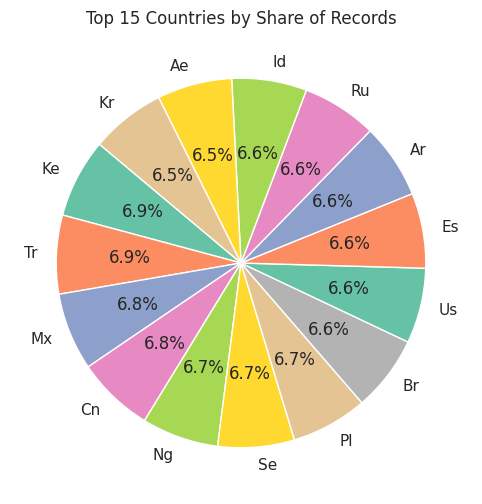

,count,count
0,Ke,1699
1,Tr,1689
2,Mx,1665
3,Cn,1657
4,Ng,1647
5,Se,1641
6,Pl,1638
7,Br,1622
8,Us,1614
9,Es,1611


In [7]:
if "country" in df.columns:
    country_counts = df["country"].value_counts().head(15)
    plt.figure(figsize=(8,6))
    country_counts.plot(kind="pie", autopct="%1.1f%%", startangle=140)
    plt.ylabel("")
    plt.title("Top 15 Countries by Share of Records")
    plt.show()

    # Also show table for clarity
    display(country_counts.reset_index().rename(columns={"index":"country","country":"count"}))


# Heatmap

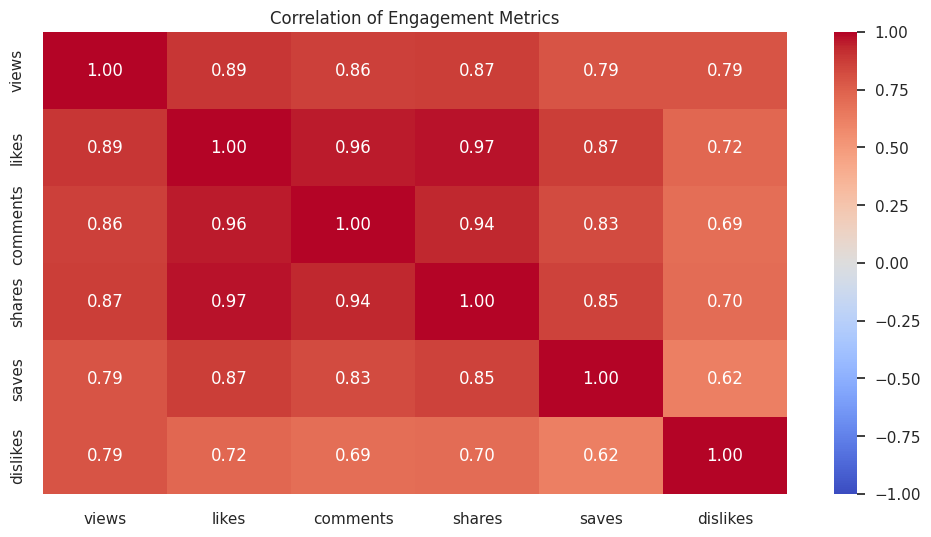

In [8]:
cand = ["views","likes","comments","shares","saves","dislikes"]
metrics = [c for c in cand if c in df.columns]
corr = df[metrics].corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation of Engagement Metrics"); plt.show()


## Engagement Rate Distribution by Platform

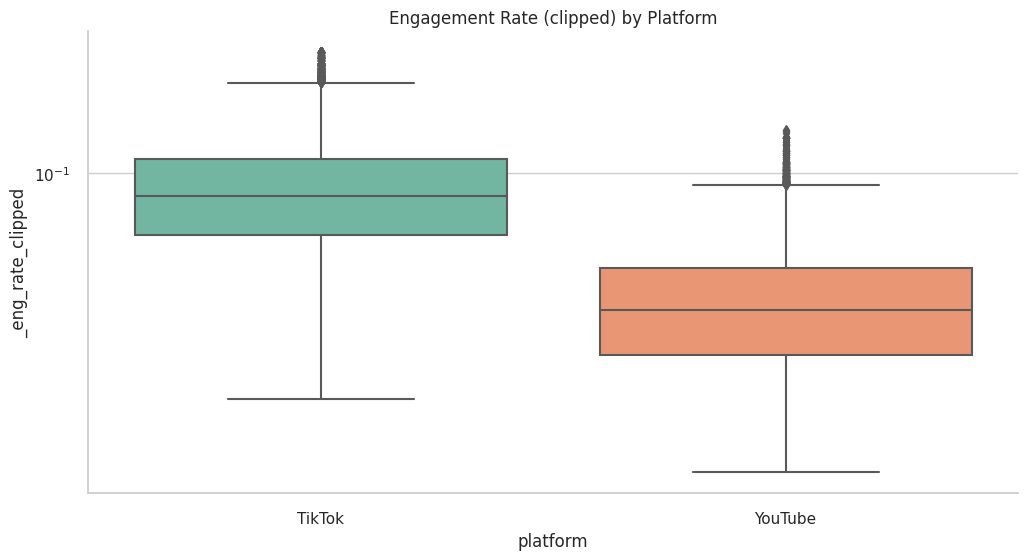

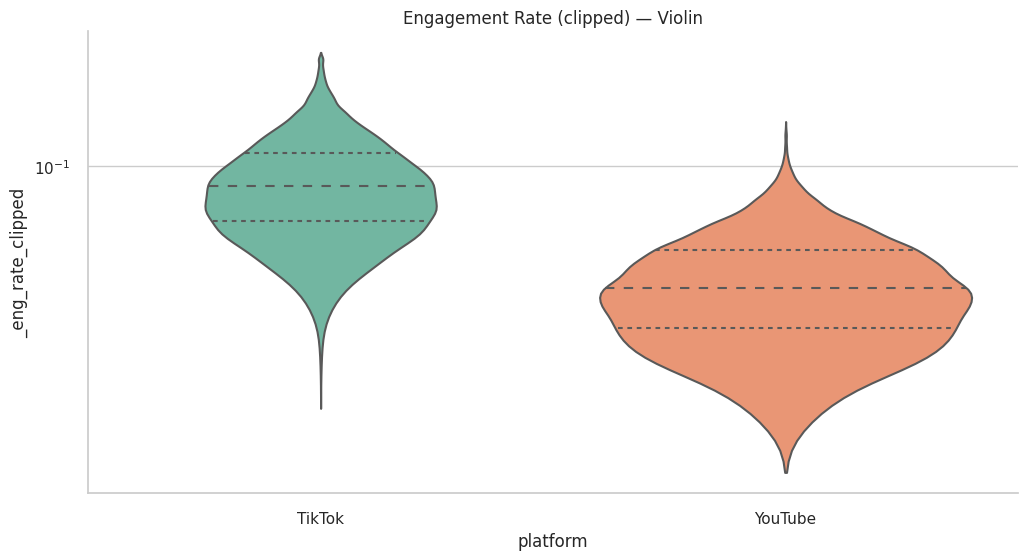

In [9]:
if {"platform","engagement_rate"}.issubset(df.columns):
    e = df["engagement_rate"].clip(lower=df["engagement_rate"].quantile(0.001),
                                upper=df["engagement_rate"].quantile(0.999))
    df["_eng_rate_clipped"] = e

    sns.boxplot(data=df, x="platform", y="_eng_rate_clipped")
    plt.yscale("log"); plt.title("Engagement Rate (clipped) by Platform"); plt.show()

    sns.violinplot(data=df, x="platform", y="_eng_rate_clipped", inner="quartile")
    plt.yscale("log"); plt.title("Engagement Rate (clipped) — Violin"); plt.show()


## Distributions — Views, Duration, Engagement

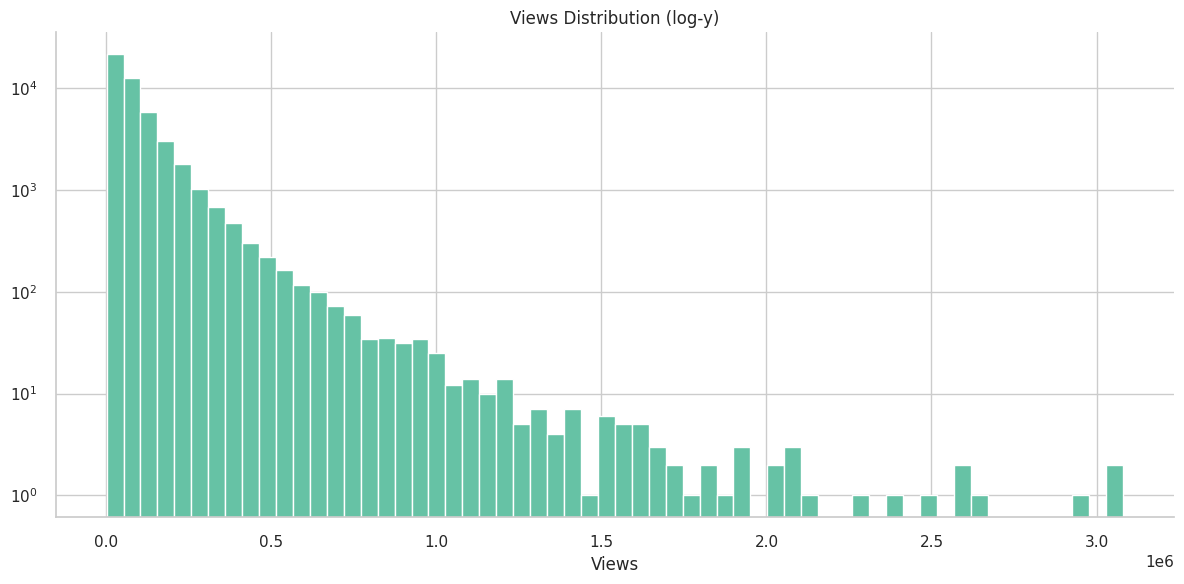

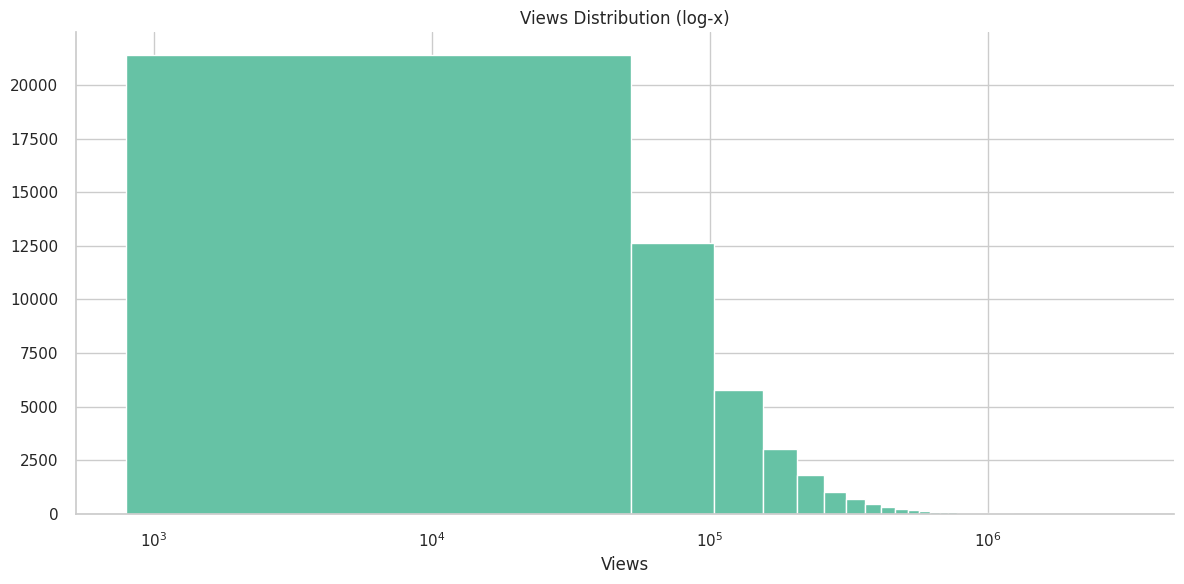

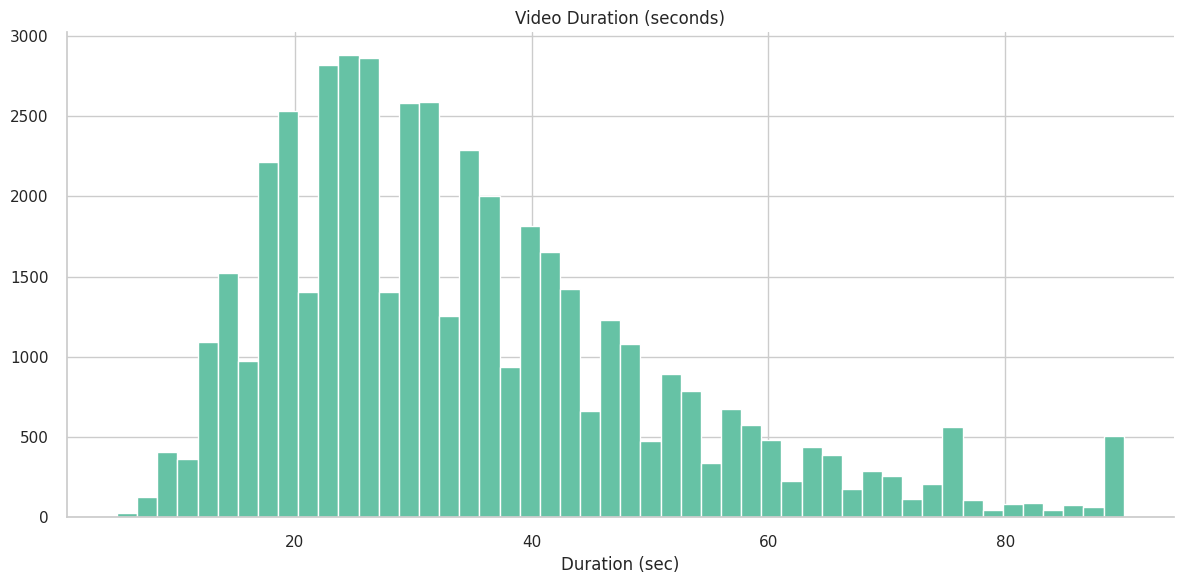

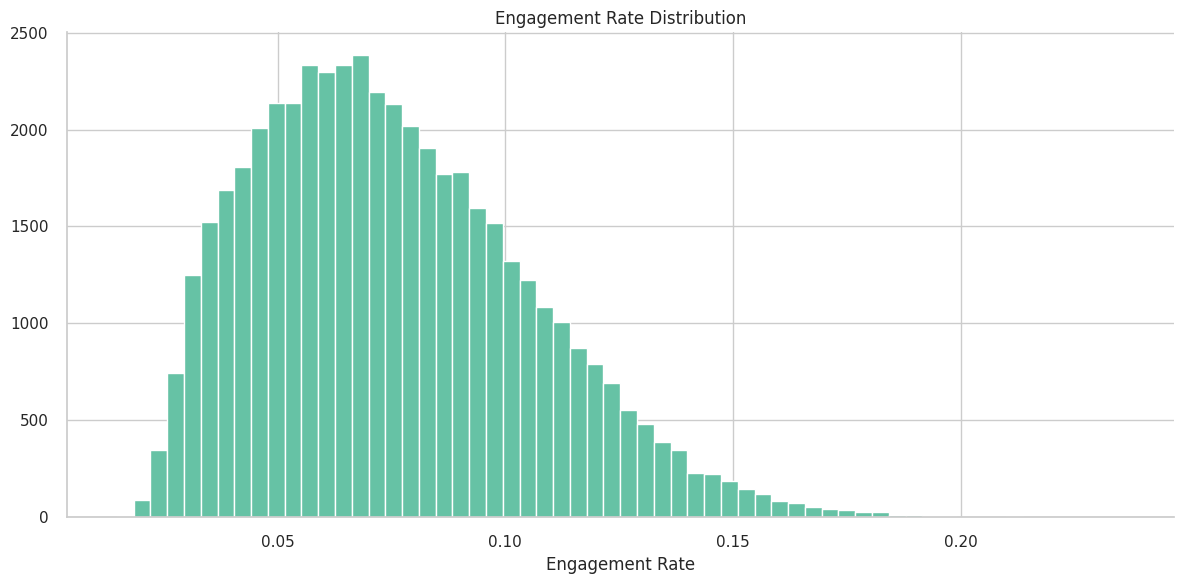

In [10]:

if "views" in df.columns:
    quick_hist(df["views"], bins=60, title="Views Distribution (log-y)", xlabel="Views", logx=False, logy=True)
    quick_hist(df["views"], bins=60, title="Views Distribution (log-x)", xlabel="Views", logx=True, logy=False)

if "duration_sec" in df.columns:
    quick_hist(df["duration_sec"], bins=50, title="Video Duration (seconds)", xlabel="Duration (sec)")

if "engagement_rate" in df.columns:
    quick_hist(df["engagement_rate"], bins=60, title="Engagement Rate Distribution", xlabel="Engagement Rate")


# Platform summaries & distributions

,platform,rows,views,median_views,p90_views,eng_rate_median
0,TikTok,28844,2878625796,59564.0,216818.9,0.088813
1,YouTube,19235,1895270855,59718.0,216251.0,0.049080


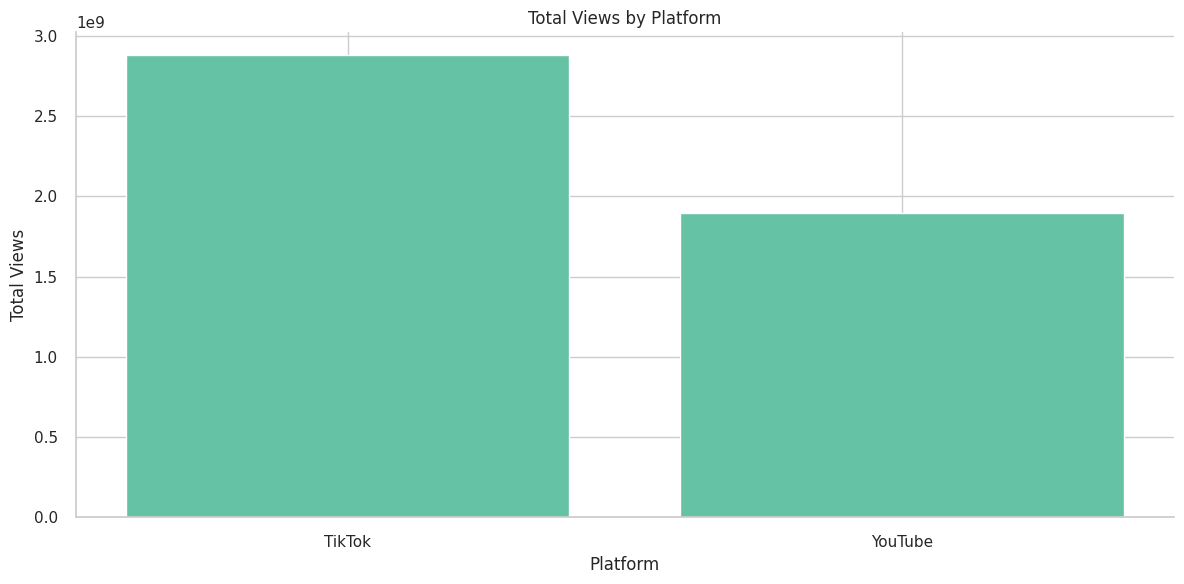

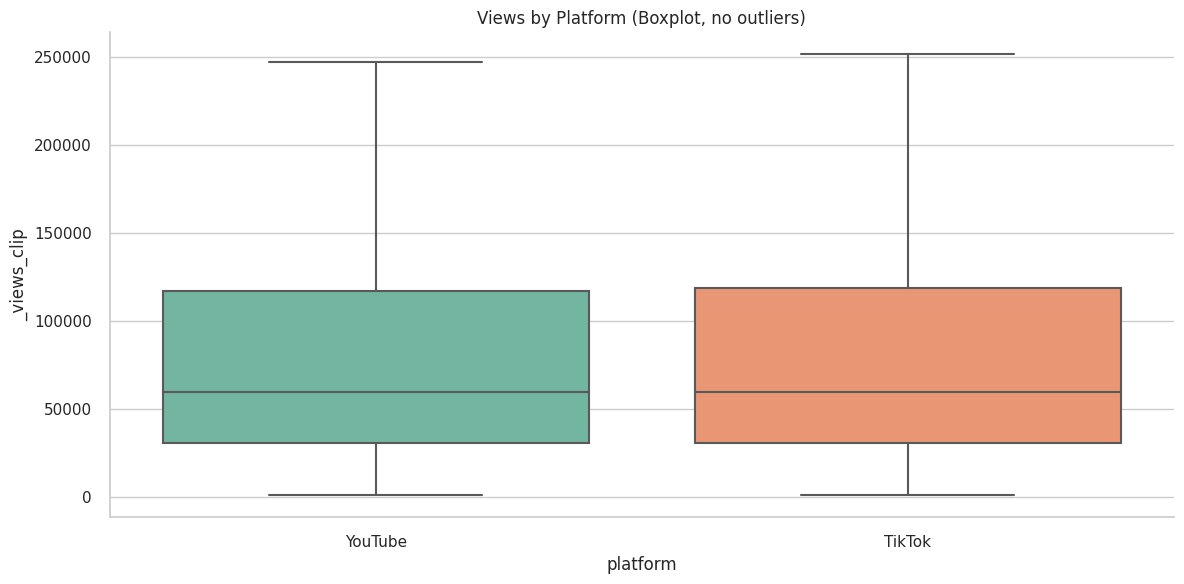

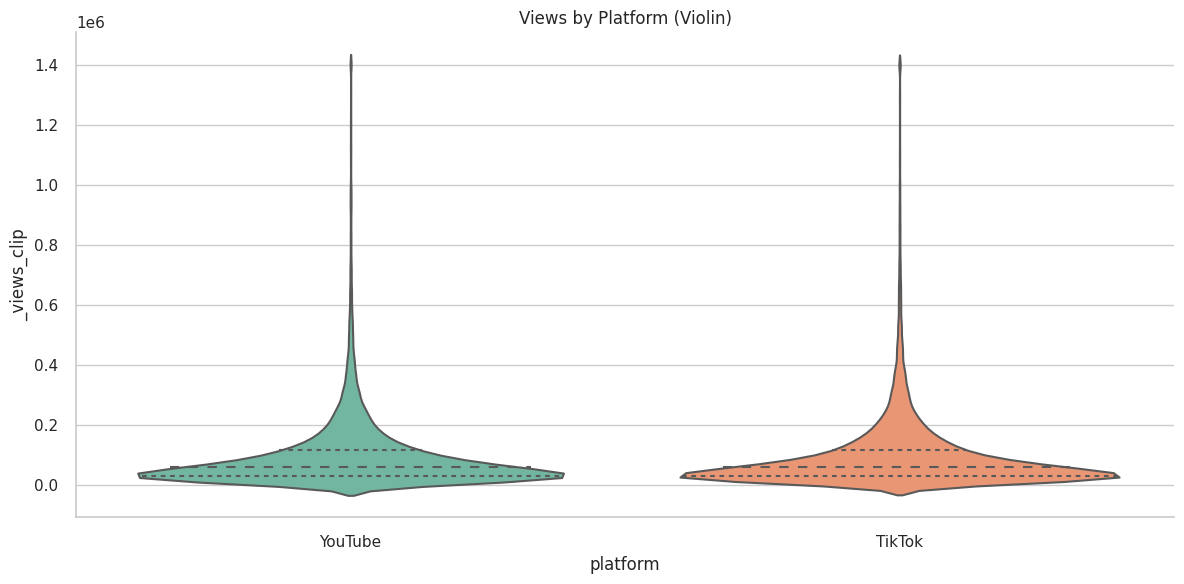

In [11]:
if "views" in df.columns:
    df["_views_clip"] = df["views"].clip(upper=df["views"].quantile(0.999))

if {"platform", "views"}.issubset(df.columns):
    agg_dict = {
        "rows": ("platform", "size"),
        "views": ("views", "sum"),
        "median_views": ("views", "median"),
        "p90_views": ("views", lambda s: s.quantile(0.90)),
    }
    if "engagement_rate" in df.columns:
        agg_dict["eng_rate_median"] = ("engagement_rate", "median")

    plat_agg = df.groupby("platform", as_index=False).agg(**agg_dict)
    display(plat_agg.sort_values("views", ascending=False))

    # Total views by platform
    quick_bar(plat_agg["platform"], plat_agg["views"],
            "Total Views by Platform", "Platform", "Total Views")

    # Order platforms by median views for consistent plotting
    order = df.groupby("platform")["views"].median().sort_values(ascending=False).index.tolist()

    # Boxplot
    sns.boxplot(data=df, x="platform", y="_views_clip", order=order, showfliers=False)
    plt.title("Views by Platform (Boxplot, no outliers)")
    plt.tight_layout(); plt.show()

    # Violin
    sns.violinplot(data=df, x="platform", y="_views_clip", order=order, inner="quartile")
    plt.title("Views by Platform (Violin)")
    plt.tight_layout(); plt.show()



## Country × Platform Coverage Matrix

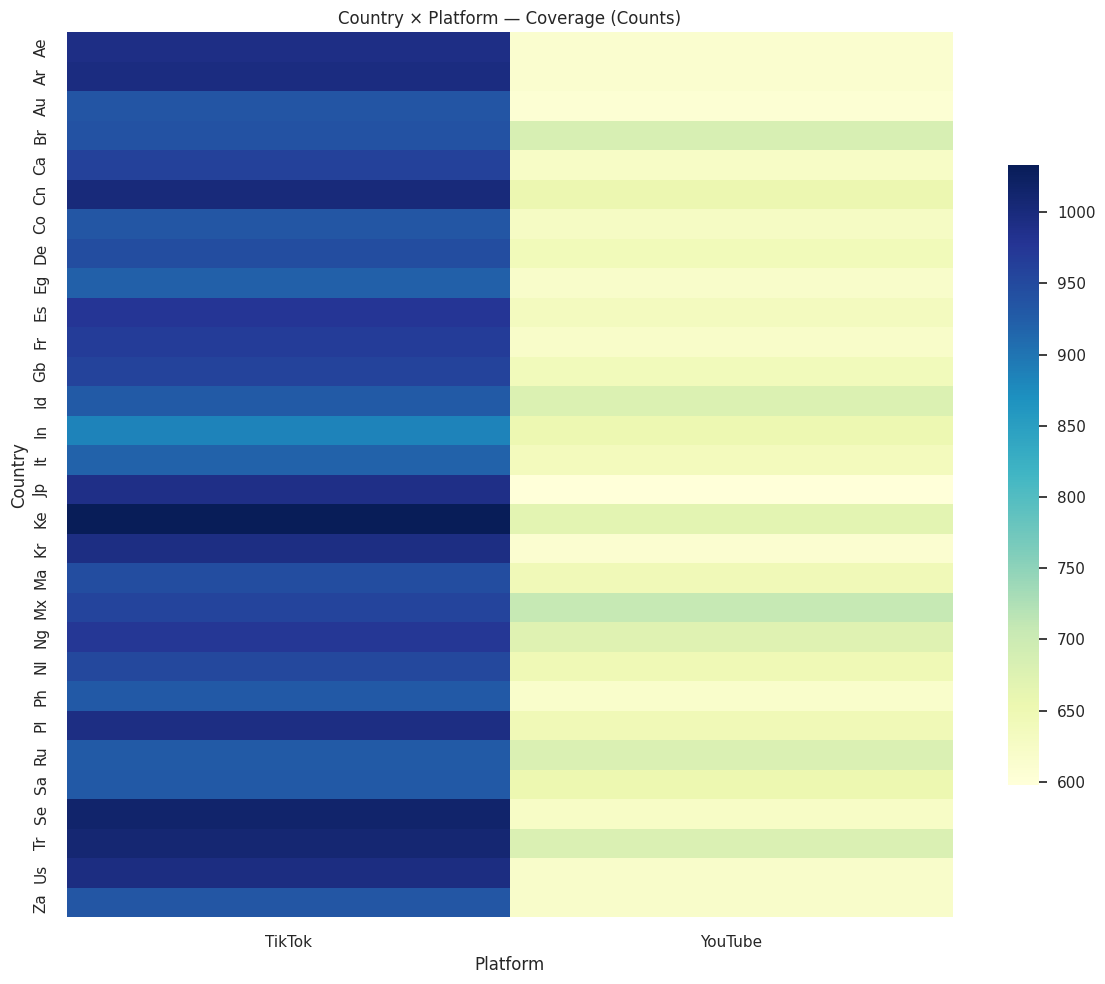

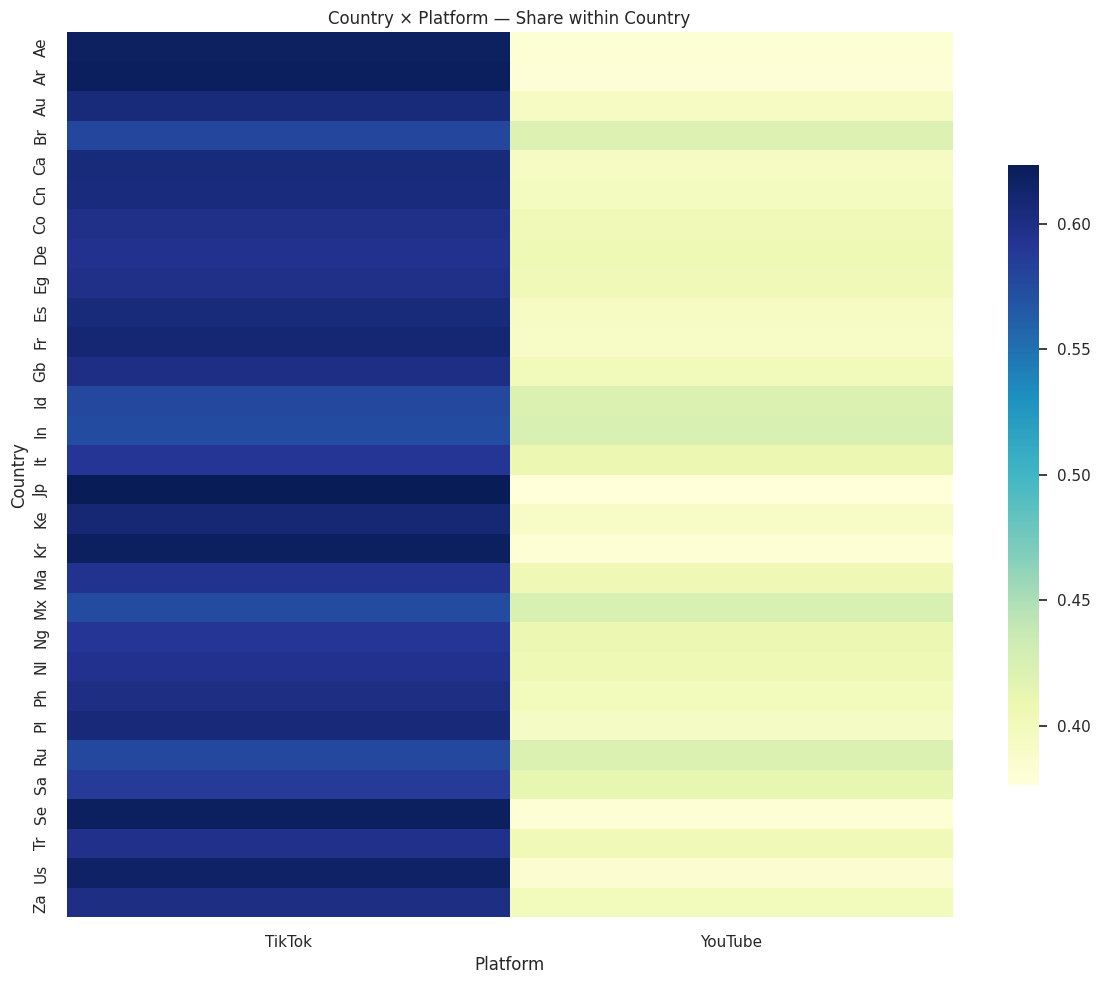

In [12]:
# === Country × Platform Coverage ===
if {"country", "platform"}.issubset(df.columns):
    mat = df.pivot_table(
        index="country", columns="platform",
        values="row_id" if "row_id" in df.columns else "views",
        aggfunc="count", fill_value=0
    )

    # Absolute counts
    plt.figure(figsize=(12, max(6, len(mat)//3)))
    sns.heatmap(mat, cmap="YlGnBu", cbar_kws={"shrink": 0.7})
    plt.title("Country × Platform — Coverage (Counts)")
    plt.xlabel("Platform"); plt.ylabel("Country")
    plt.tight_layout(); plt.show()

    # Row-normalized (share per country)
    rs = mat.div(mat.sum(axis=1).replace(0, np.nan), axis=0).fillna(0)
    plt.figure(figsize=(12, max(6, len(rs)//3)))
    sns.heatmap(rs, cmap="YlGnBu", cbar_kws={"shrink": 0.7})
    plt.title("Country × Platform — Share within Country")
    plt.xlabel("Platform"); plt.ylabel("Country")
    plt.tight_layout(); plt.show()


## Monthly trends (simple & robust)

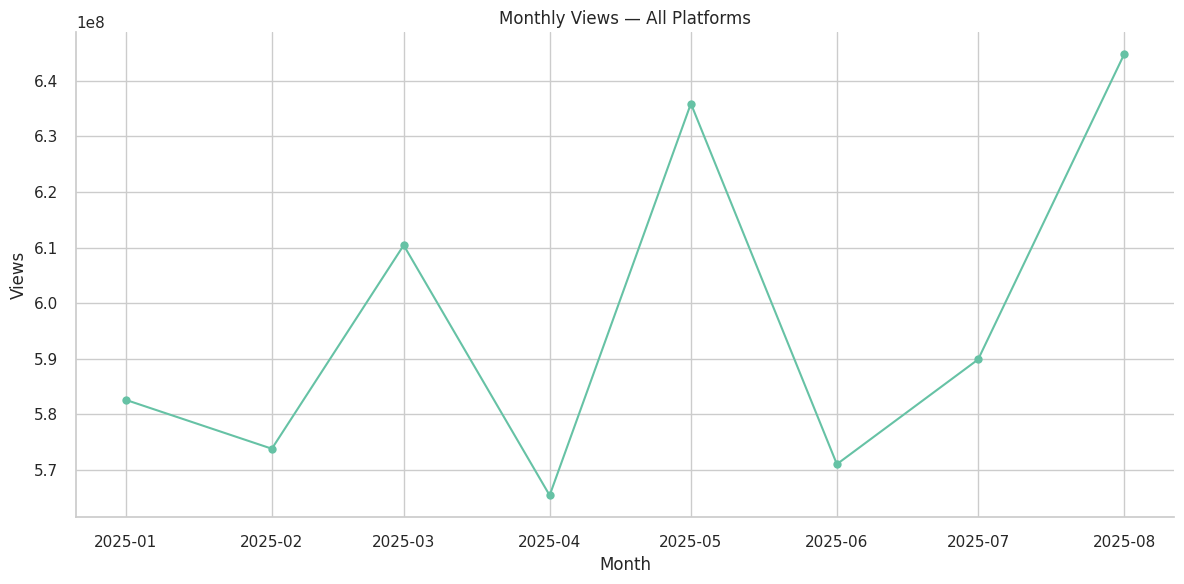

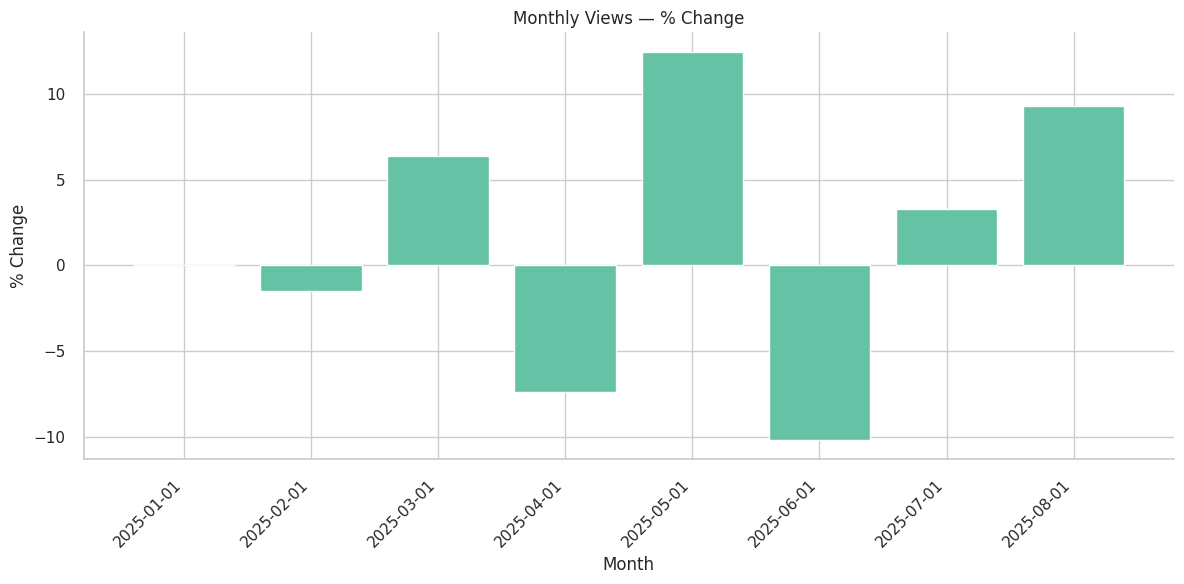

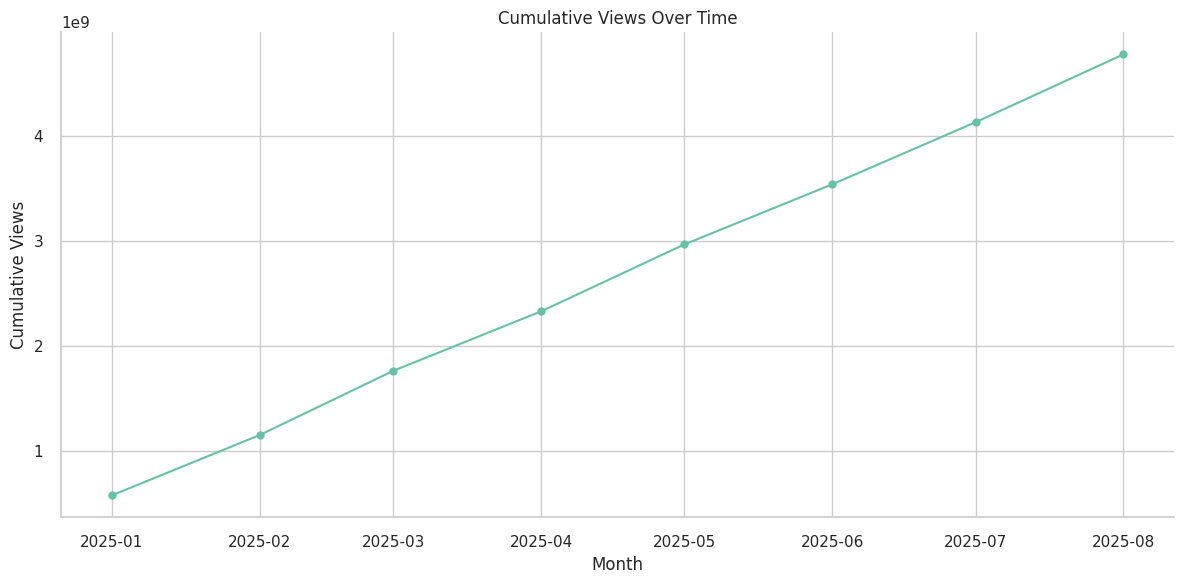

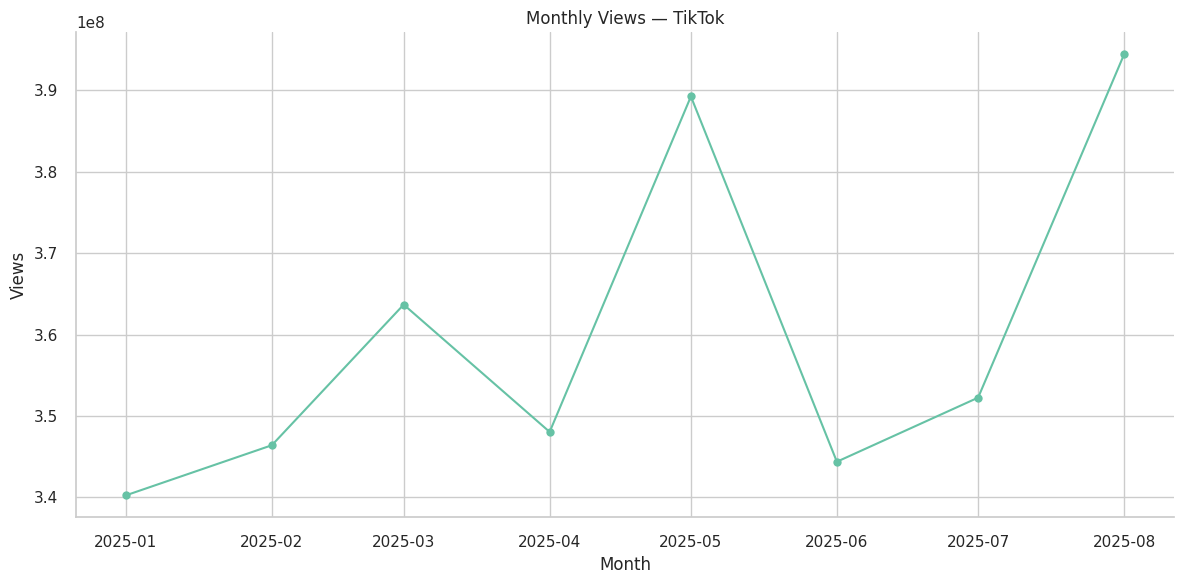

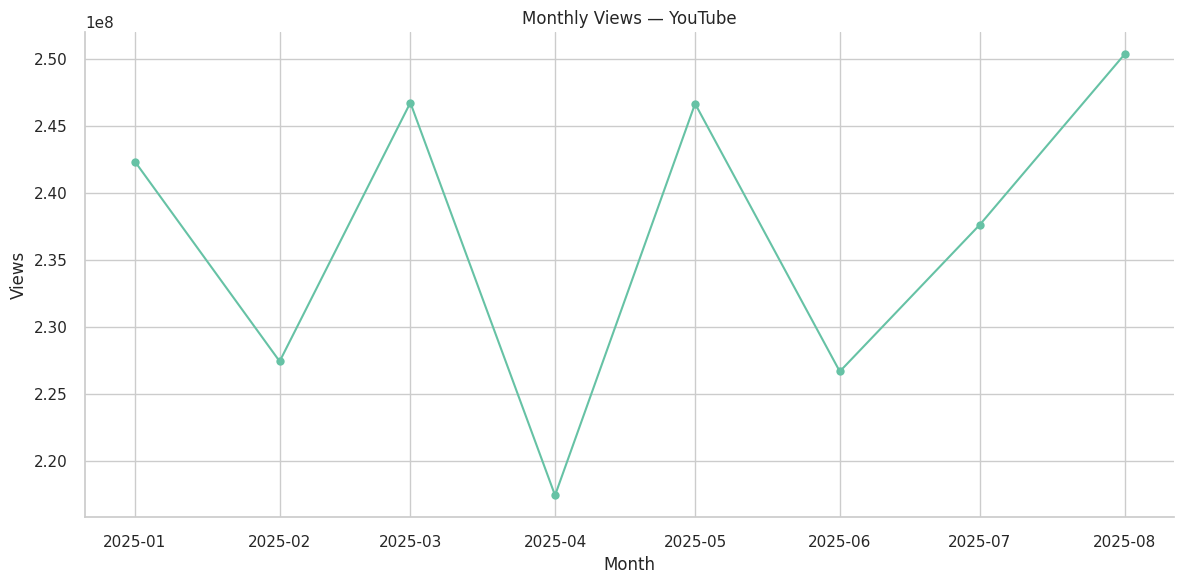

In [13]:
# 0) Pick a line-plot function
if 'quick_line' in globals():
    _qline = quick_line
else:
    def _qline(x, y, title, xlabel=None, ylabel=None):
        import matplotlib.pyplot as plt
        plt.figure()
        plt.plot(x, y, marker="o")
        plt.title(title)
        if xlabel: plt.xlabel(xlabel)
        if ylabel: plt.ylabel(ylabel)
        plt.tight_layout()
        plt.show()

# 1) Choose/build monthly key (prefer year_month_dt)
ts_key = None
if "year_month_dt" in df.columns and df["year_month_dt"].notna().any():
    ts_key = "year_month_dt"
elif "year_month" in df.columns:
    df["year_month_dt"] = pd.to_datetime(df["year_month"].astype(str) + "-01", errors="coerce")
    ts_key = "year_month_dt"
elif "publish_date_approx" in df.columns:
    df["publish_date_approx"] = pd.to_datetime(df["publish_date_approx"], errors="coerce")
    df["year_month_dt"] = df["publish_date_approx"].dt.to_period("M").dt.to_timestamp()
    ts_key = "year_month_dt"

# 2) Plots: all, % change, cumulative, per-platform
if ts_key and "views" in df.columns and df[ts_key].notna().any():
    monthly_all = df.groupby(ts_key)["views"].sum().sort_index()

    # Reindex to a continuous monthly range to fill gaps with zeros
    idx = pd.period_range(
        monthly_all.index.min().to_period("M"),
        monthly_all.index.max().to_period("M"),
        freq="M"
    ).to_timestamp()
    monthly_all = monthly_all.reindex(idx, fill_value=0)

    # All platforms
    _qline(monthly_all.index, monthly_all.values,
           "Monthly Views — All Platforms", "Month", "Views")

    # % change
    pct_change = monthly_all.pct_change().mul(100).fillna(0)
    plt.figure()
    plt.bar(monthly_all.index.astype(str), pct_change.values)
    plt.title("Monthly Views — % Change")
    plt.xlabel("Month"); plt.ylabel("% Change")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout(); plt.show()

    # Cumulative
    cum = monthly_all.cumsum()
    _qline(cum.index, cum.values,
           "Cumulative Views Over Time", "Month", "Cumulative Views")

    # Per platform
    if "platform" in df.columns:
        monthly = df.groupby([ts_key, "platform"], as_index=False)["views"].sum()
        for plat, sub in monthly.groupby("platform", sort=False):
            sub = sub.sort_values(ts_key).set_index(ts_key)
            sub = sub.reindex(idx, fill_value=0).reset_index().rename(columns={"index": ts_key})
            _qline(sub[ts_key], sub["views"], f"Monthly Views — {plat}", "Month", "Views")


## Leaders — Creators & Hashtags

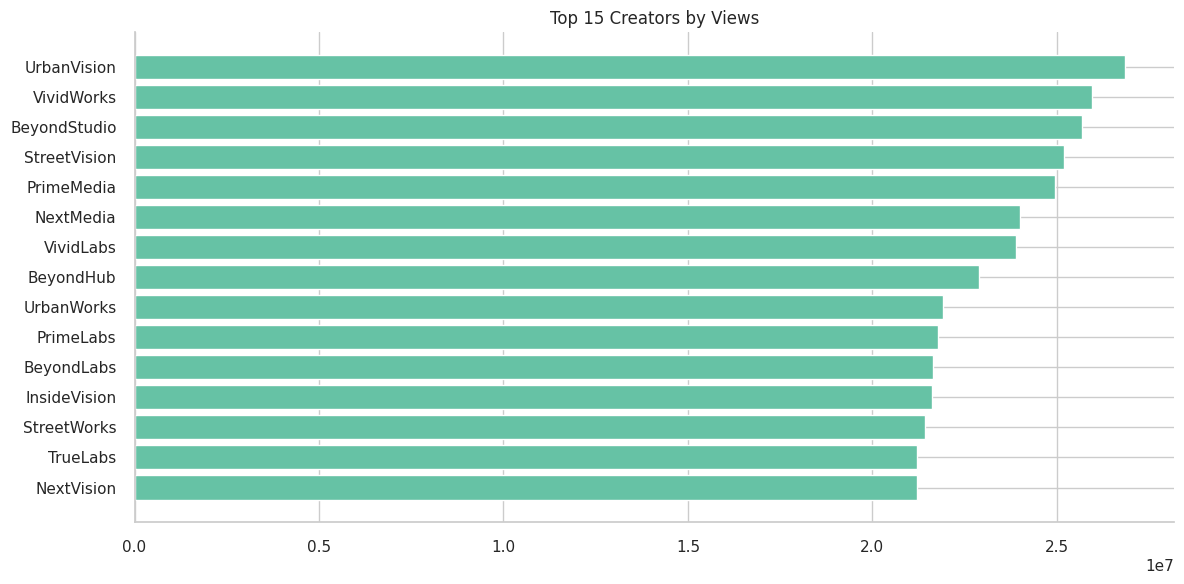

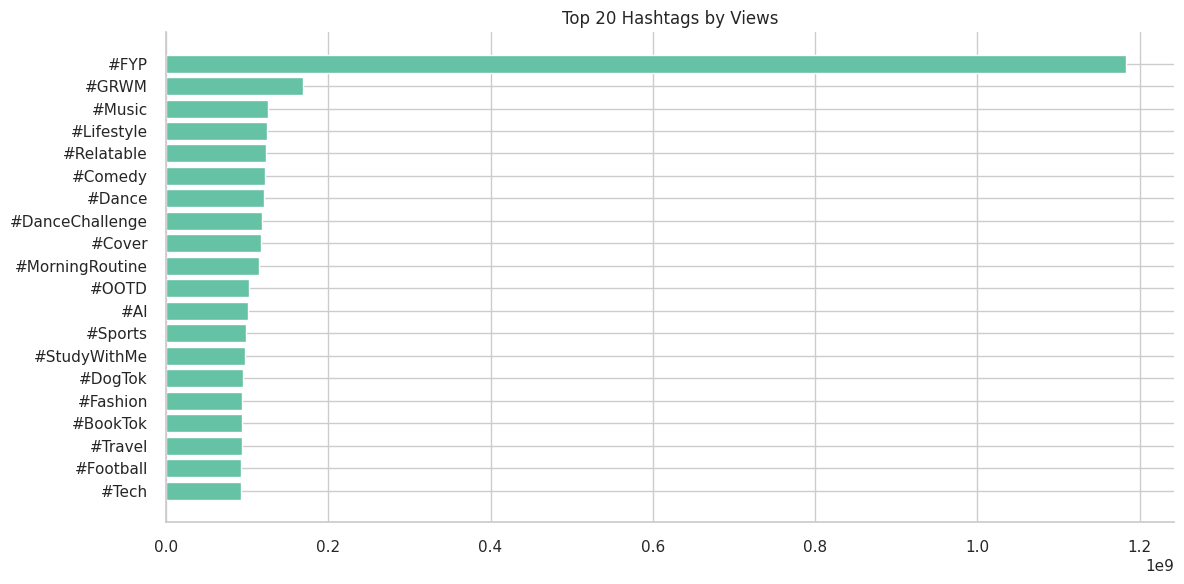

In [14]:

# Creators
name_cols = [c for c in ["author_handle", "creator", "channel_name"] if c in df.columns]
creator_key = name_cols[0] if name_cols else None


if creator_key:
    by_creator = df.groupby(creator_key, as_index=False).agg(
        rows=(creator_key,"size"),
        views=("views","sum"),
        eng_rate_med=("engagement_rate","median")
    )
    top_views = by_creator.nlargest(15, "views")
    plt.figure()
    plt.barh(top_views[creator_key][::-1], top_views["views"][::-1])
    plt.title("Top 15 Creators by Views")
    plt.tight_layout()
    plt.show()


# Hashtags
if "hashtag" in df.columns:
    by_tag = df.groupby("hashtag", as_index=False).agg(
        rows=("hashtag","size"),
        views=("views","sum")
    )
    top_tags = by_tag.nlargest(20, "views")
    plt.figure()
    plt.barh(top_tags["hashtag"][::-1], top_tags["views"][::-1])
    plt.title("Top 20 Hashtags by Views")
    plt.tight_layout()
    plt.show()


## Pareto analysis: creators vs. views

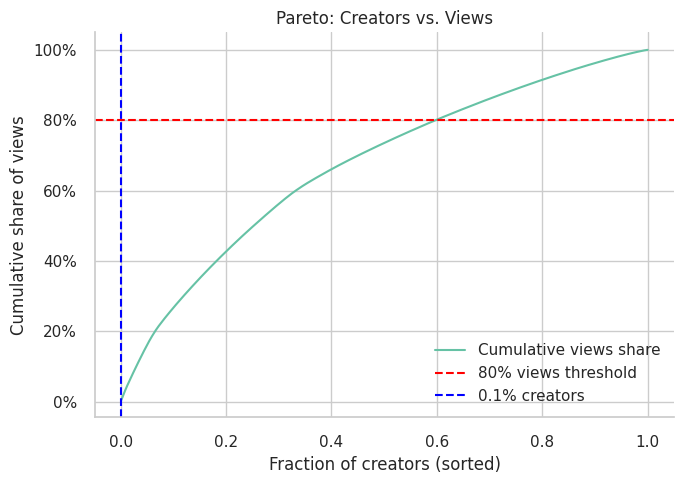

≈0.1% of creators drive 80% of total views (cutoff index: 1)


In [15]:
if creator_key:
    sc = by_creator.sort_values("views", ascending=False).reset_index(drop=True)
    sc["cum_views_pct"] = sc["views"].cumsum() / sc["views"].sum()

    cutoff_idx = (sc["cum_views_pct"] >= 0.8).idxmin() + 1
    share_pct = cutoff_idx / len(sc)

    plt.figure(figsize=(7, 5))
    x = np.arange(1, len(sc) + 1) / len(sc)
    plt.plot(x, sc["cum_views_pct"].values, label="Cumulative views share")

    # 80% horizontal line
    plt.axhline(0.8, ls="--", color="red", label="80% views threshold")
    # vertical line at share_pct
    plt.axvline(share_pct, ls="--", color="blue", label=f"{share_pct:.1%} creators")

    plt.title("Pareto: Creators vs. Views")
    plt.xlabel("Fraction of creators (sorted)")
    plt.ylabel("Cumulative share of views")
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"≈{share_pct:.1%} of creators drive 80% of total views (cutoff index: {cutoff_idx})")


## Cross‑Sections — Device, Hour, Category, Language, Season

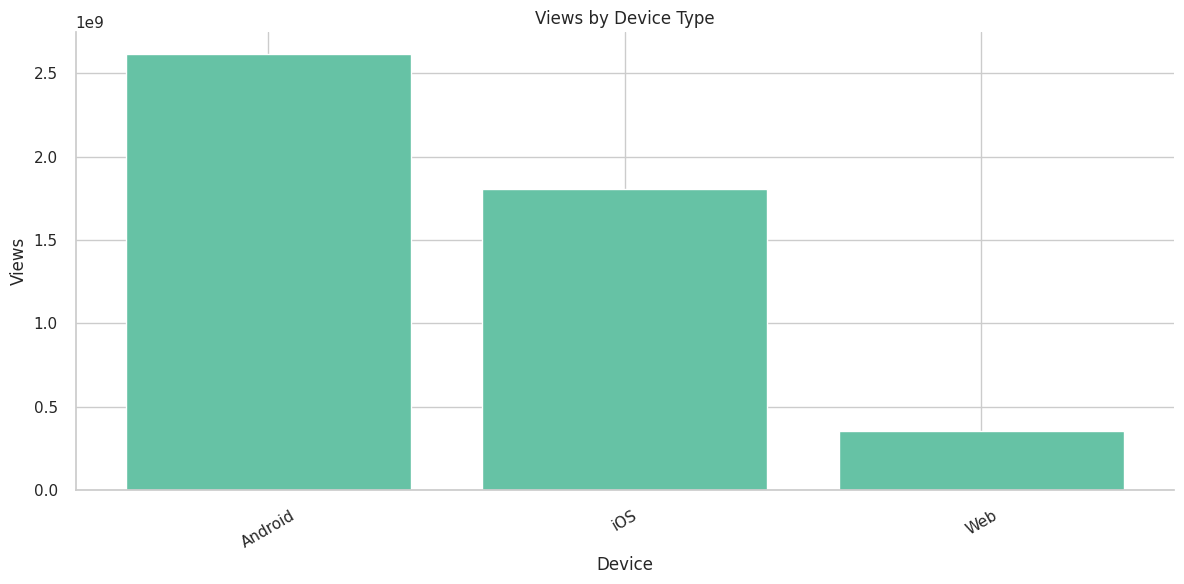

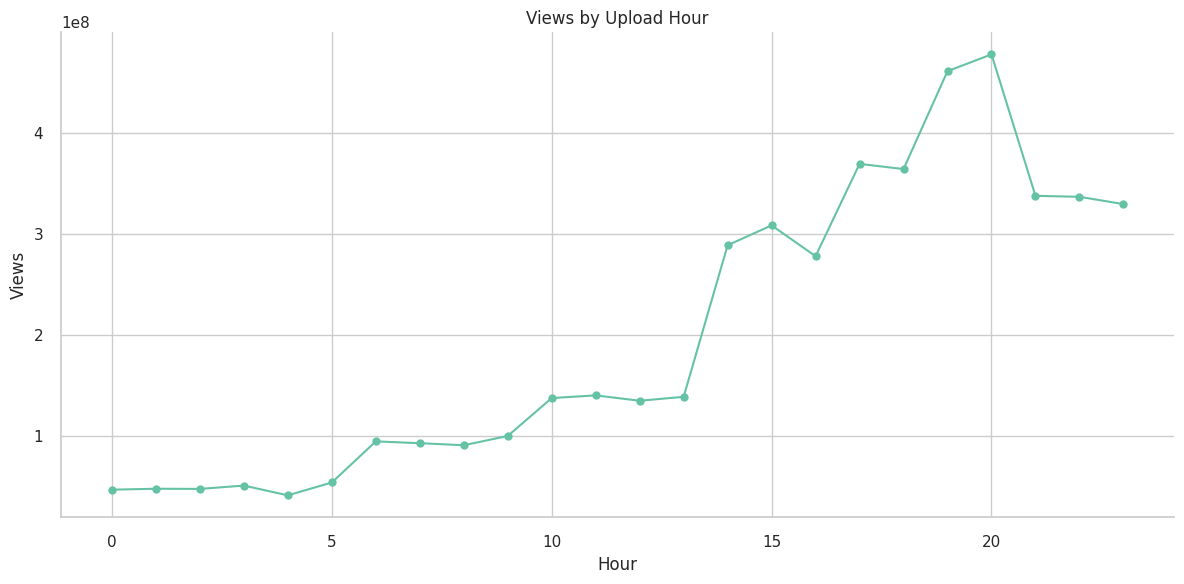

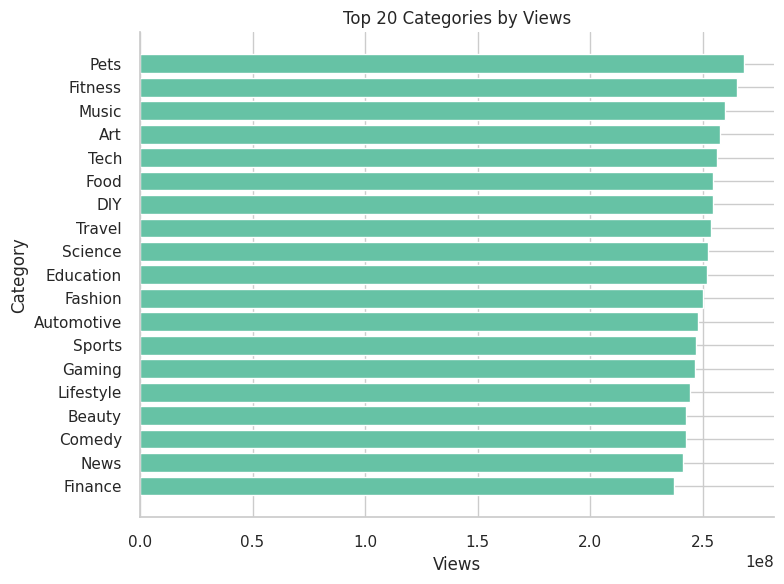

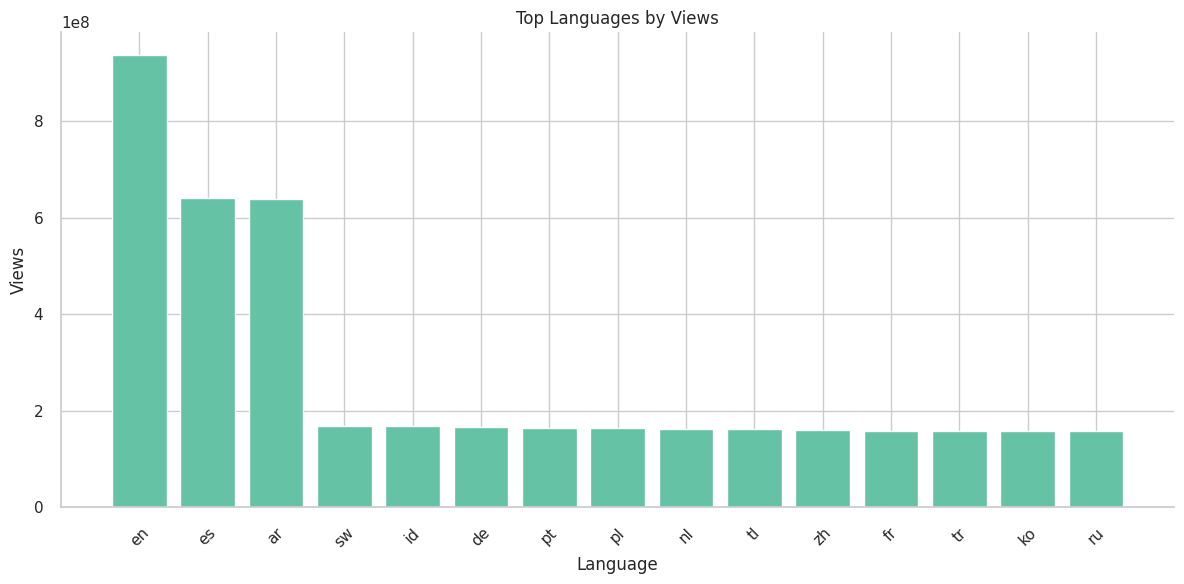

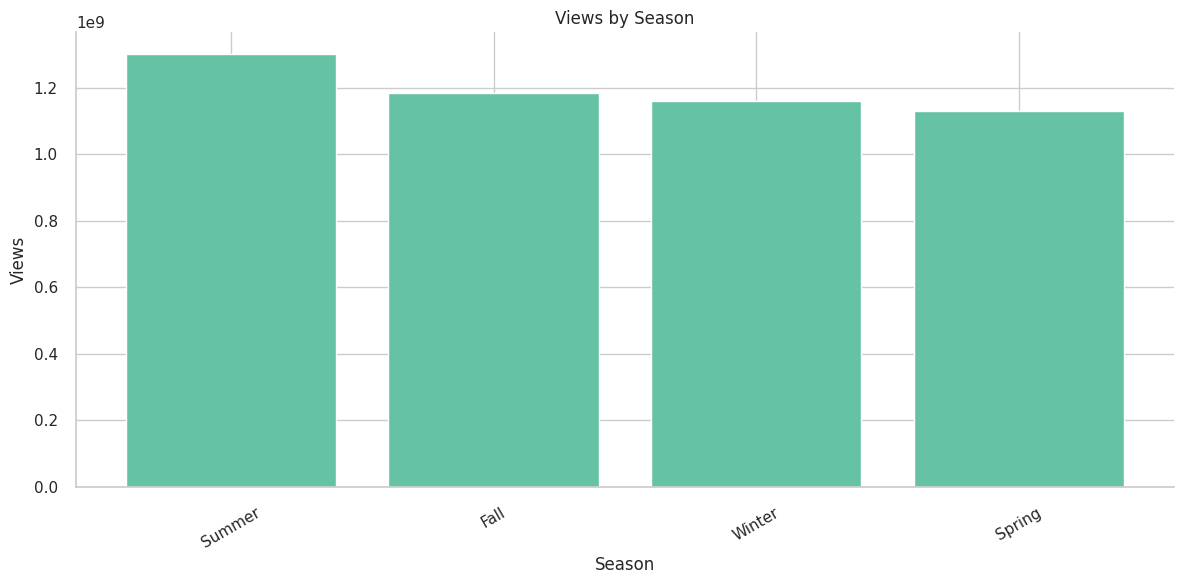

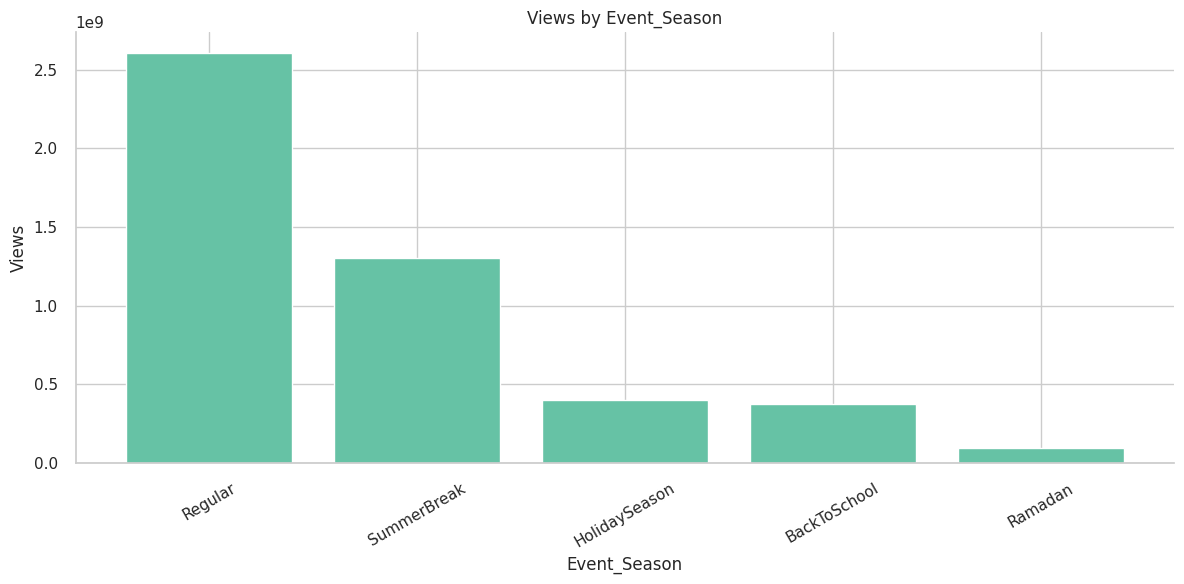

In [16]:
# Device
if "device_type" in df.columns and "views" in df.columns:
    dev = (df.groupby("device_type", as_index=False)
             .agg(rows=("device_type","size"), views=("views","sum"))
             .sort_values("views", ascending=False))
    quick_bar(dev["device_type"], dev["views"], "Views by Device Type", "Device", "Views", rotation=30)

# Hour (ensure numeric and sorted)
if "upload_hour" in df.columns and "views" in df.columns:
    hr = df.copy()
    hr["upload_hour"] = pd.to_numeric(hr["upload_hour"], errors="coerce")
    hr = (hr.dropna(subset=["upload_hour"])
            .groupby("upload_hour", as_index=False)
            .agg(rows=("upload_hour","size"), views=("views","sum"))
            .sort_values("upload_hour"))
    quick_line(hr["upload_hour"], hr["views"], "Views by Upload Hour", "Hour", "Views")

# Category (Top-20 by views)
if "category" in df.columns and "views" in df.columns:
    cat = (df.groupby("category", as_index=False)
             .agg(rows=("category","size"), views=("views","sum"))
             .sort_values("views", ascending=False)
             .head(20))
    plt.figure(figsize=(8, 6))
    plt.barh(cat["category"][::-1], cat["views"][::-1])
    plt.title("Top 20 Categories by Views")
    plt.xlabel("Views"); plt.ylabel("Category")
    plt.tight_layout(); plt.show()

# Language (Top-15 by views)
if "language" in df.columns and "views" in df.columns:
    lang = (df.groupby("language", as_index=False)
              .agg(rows=("language","size"), views=("views","sum"))
              .sort_values("views", ascending=False)
              .head(15))
    quick_bar(lang["language"], lang["views"], "Top Languages by Views", "Language", "Views", rotation=45)

# Season / Event season
for key in ["season", "event_season"]:
    if key in df.columns and "views" in df.columns:
        s = (df.groupby(key, as_index=False)
               .agg(rows=(key,"size"), views=("views","sum"))
               .sort_values("views", ascending=False))
        quick_bar(s[key], s["views"], f"Views by {key.title()}", key.title(), "Views", rotation=30)


## Trend Types & Velocity

,trend_type,rows,duration_med,velocity_med,views
2,Short,24088,5.0,12472.300,2387382950
1,Medium,16762,14.0,4328.735,1679518955
0,Evergreen,7229,41.0,1488.060,706994746


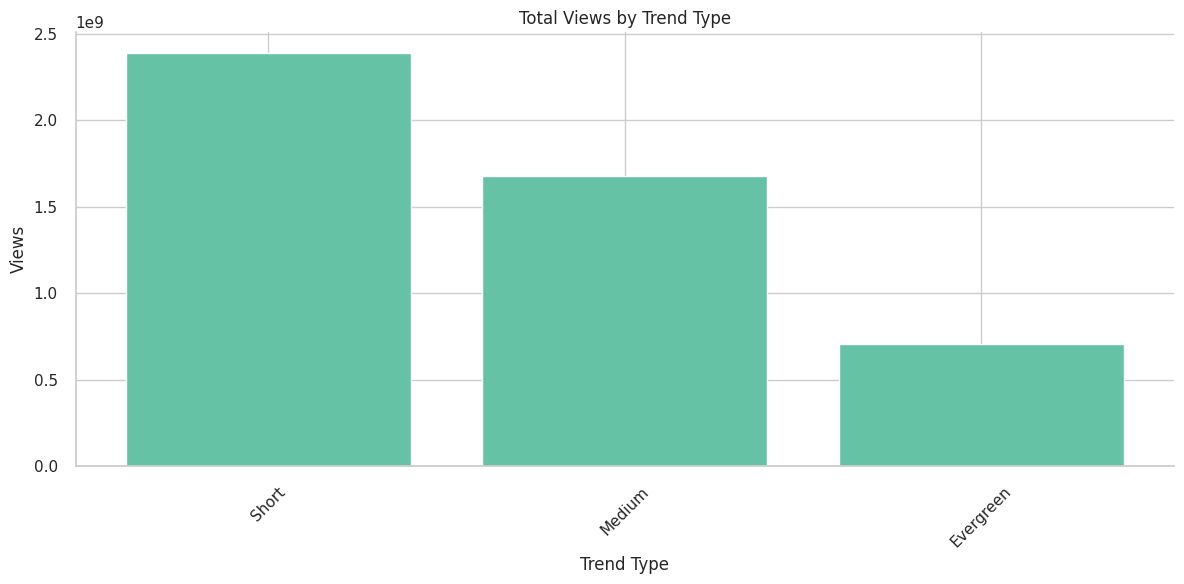

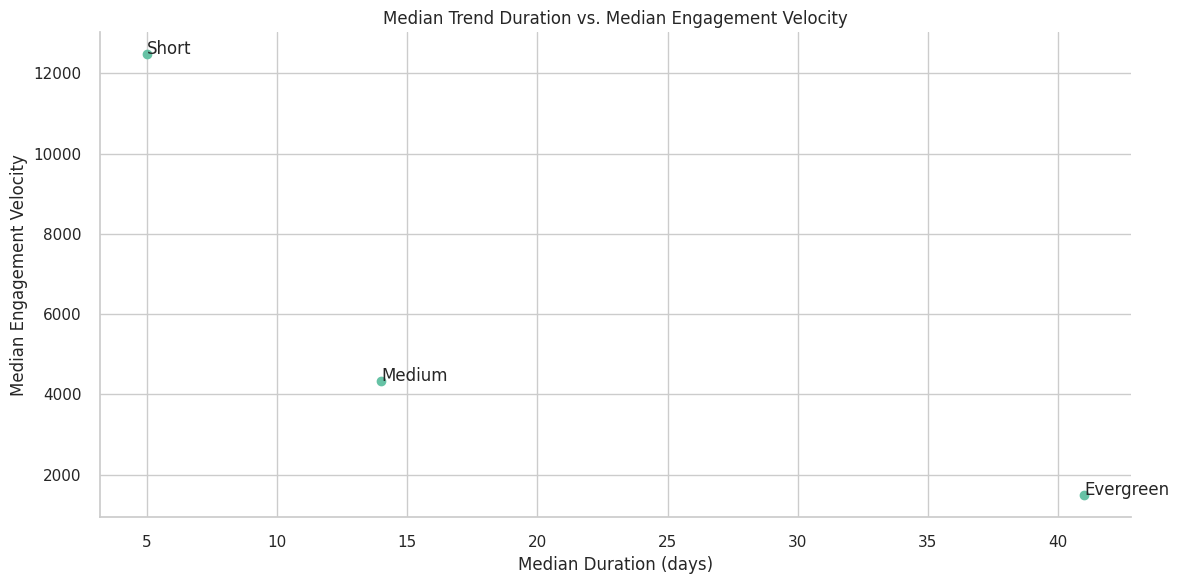

In [17]:
cols_needed = {"trend_type", "trend_duration_days", "engagement_velocity"}
if cols_needed.issubset(df.columns) and "views" in df.columns:
    # Ensure numeric for duration/velocity
    df["trend_duration_days"] = pd.to_numeric(df["trend_duration_days"], errors="coerce")
    df["engagement_velocity"] = pd.to_numeric(df["engagement_velocity"], errors="coerce")

    agg = (df.groupby("trend_type", as_index=False)
             .agg(rows=("trend_type","size"),
                  duration_med=("trend_duration_days","median"),
                  velocity_med=("engagement_velocity","median"),
                  views=("views","sum"))
             .sort_values("views", ascending=False))

    display(agg.head(20))

    # Total views by trend type
    quick_bar(agg["trend_type"], agg["views"],
              "Total Views by Trend Type", "Trend Type", "Views", rotation=45)

    # Median duration vs median velocity (annotate top-15 by views to avoid clutter)
    topn = agg.head(15).reset_index(drop=True)
    plt.figure()
    plt.scatter(topn["duration_med"], topn["velocity_med"])
    for i, lbl in enumerate(topn["trend_type"]):
        plt.annotate(lbl, (topn["duration_med"].iloc[i], topn["velocity_med"].iloc[i]))
    plt.title("Median Trend Duration vs. Median Engagement Velocity")
    plt.xlabel("Median Duration (days)")
    plt.ylabel("Median Engagement Velocity")
    plt.tight_layout()
    plt.show()


## Titles & Emojis — Does style matter?

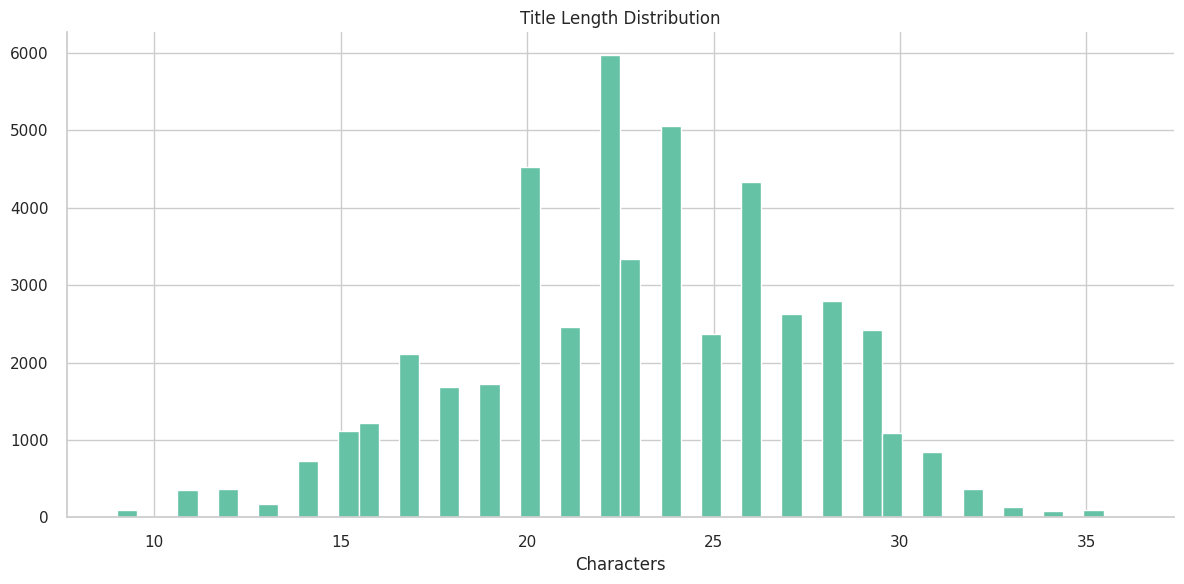

,has_emoji,rows,views,med_views
0,False,25944,2618173736,60413.5
1,True,22135,2155722915,58759.0


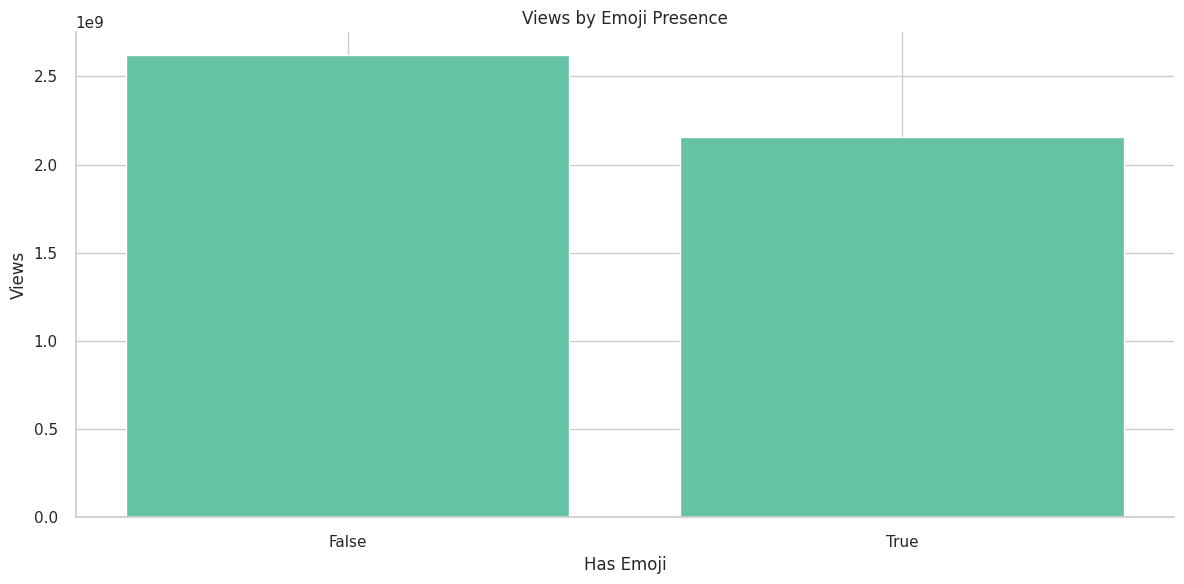

In [18]:
if "title_length" in df.columns:
    quick_hist(df["title_length"], bins=50, title="Title Length Distribution", xlabel="Characters")

if {"has_emoji","views"}.issubset(df.columns):
    em = df.groupby("has_emoji", as_index=False).agg(rows=("has_emoji","size"), views=("views","sum"), med_views=("views","median"))
    display(em)
    quick_bar(em["has_emoji"].astype(str), em["views"], "Views by Emoji Presence", "Has Emoji", "Views")


##  Watch Time & Completion

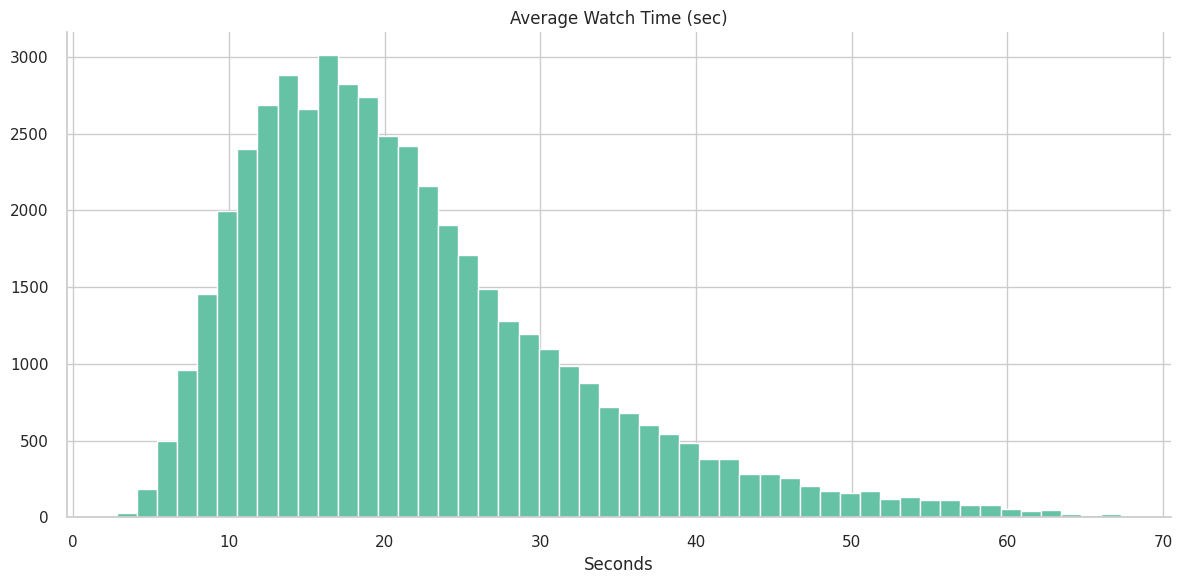

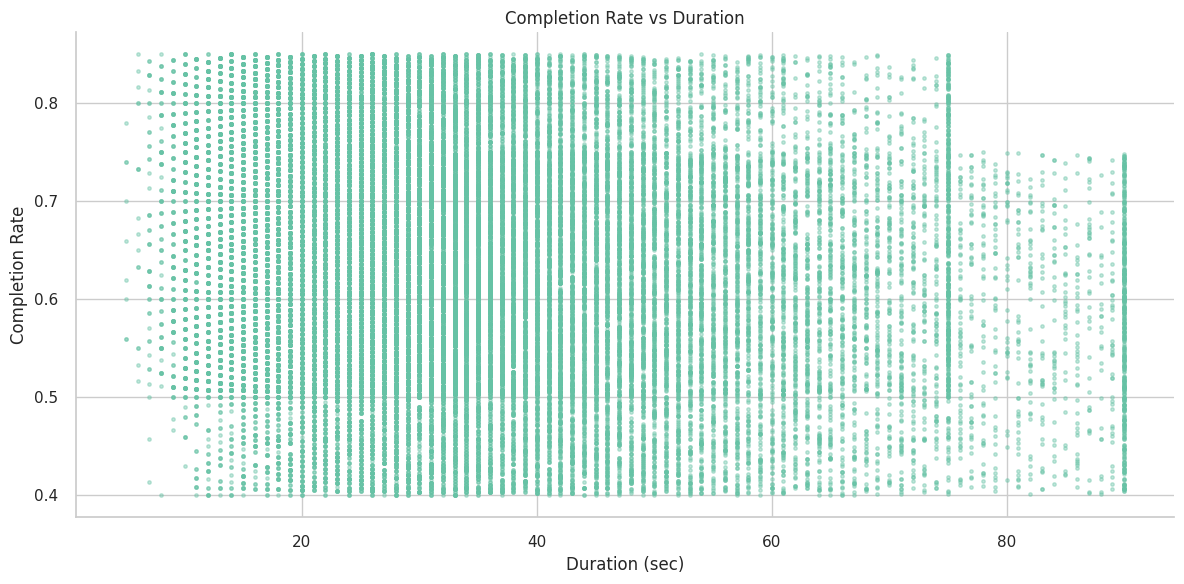

In [19]:

present = [c for c in ["avg_watch_time_sec","completion_rate","duration_sec","views"] if c in df.columns]
if len(present) >= 2:
    if "avg_watch_time_sec" in df.columns:
        quick_hist(df["avg_watch_time_sec"], bins=50, title="Average Watch Time (sec)", xlabel="Seconds")
    if {"completion_rate","duration_sec"}.issubset(df.columns):
        # Scatter: completion vs duration
        plt.figure()
        plt.scatter(df["duration_sec"], df["completion_rate"], s=6, alpha=0.4)
        plt.title("Completion Rate vs Duration")
        plt.xlabel("Duration (sec)")
        plt.ylabel("Completion Rate")
        plt.tight_layout()
        plt.show()


## Traffic Source & Device Brand

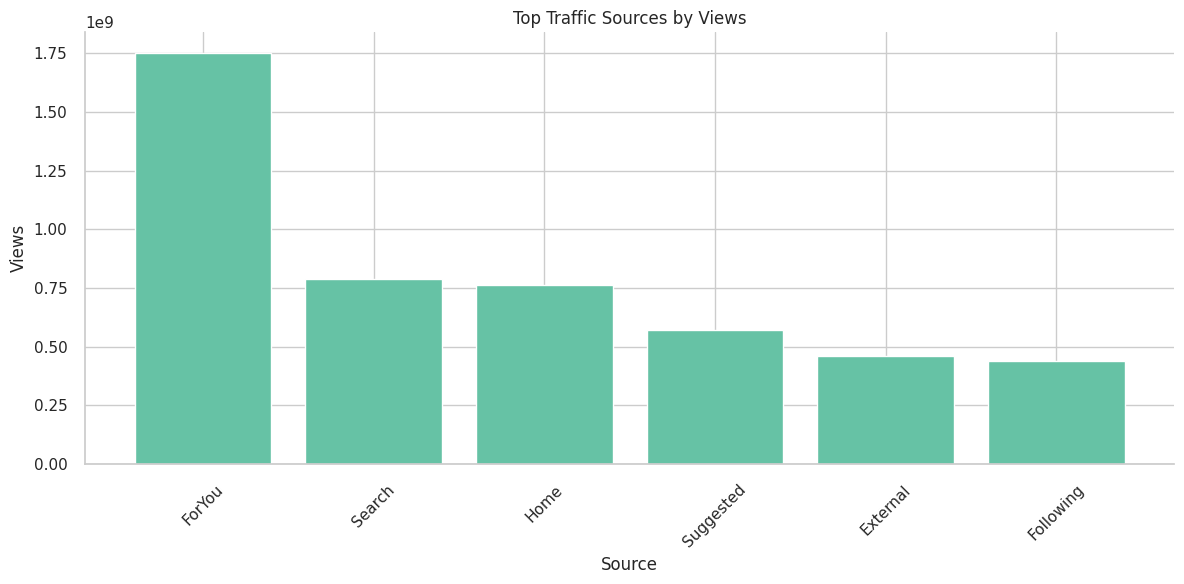

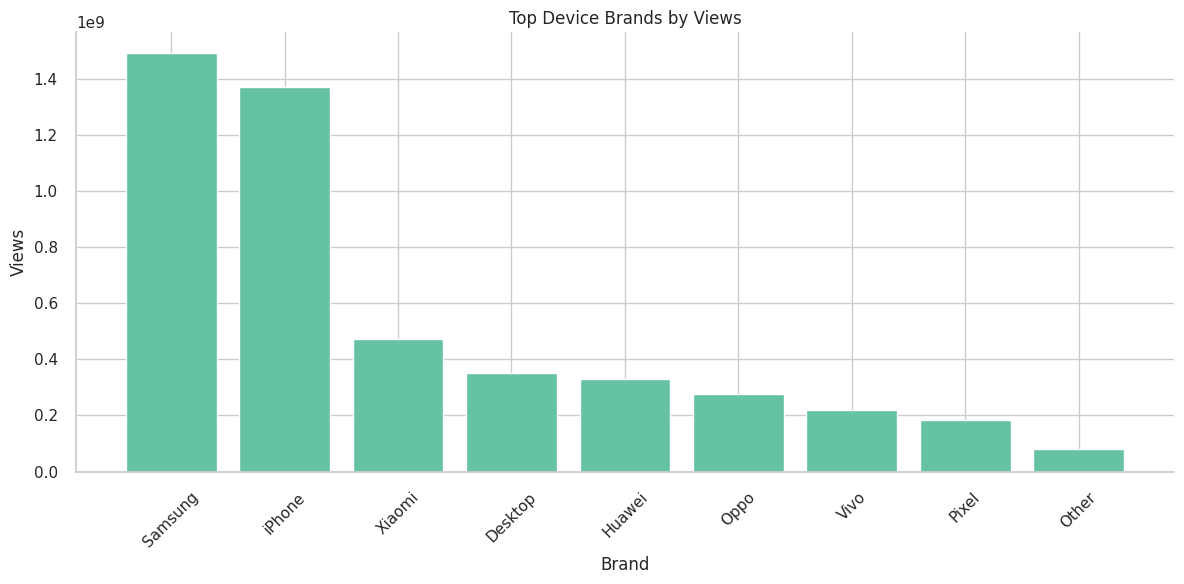

In [20]:

if "traffic_source" in df.columns:
    ts = df.groupby("traffic_source", as_index=False).agg(rows=("traffic_source","size"), views=("views","sum"))
    ts_top = ts.nlargest(12, "views")
    quick_bar(ts_top["traffic_source"], ts_top["views"], "Top Traffic Sources by Views", "Source", "Views", rotation=45)

if "device_brand" in df.columns:
    db = df.groupby("device_brand", as_index=False).agg(rows=("device_brand","size"), views=("views","sum"))
    db_top = db.nlargest(12, "views")
    quick_bar(db_top["device_brand"], db_top["views"], "Top Device Brands by Views", "Brand", "Views", rotation=45)


## Key Takeaways

- Engagement metrics vary widely across platforms; distributions are heavy-tailed, requiring log scaling for clarity.  
- A small fraction of creators account for the majority of views (Pareto 80/20 holds strongly).  
- Platform activity and views evolve monthly, showing momentum shifts and cumulative growth over the year.  
- Country × Platform coverage highlights uneven adoption, with some countries skewed toward a single platform.  
- Cross-sections by device, upload hour, and content category reveal distinct audience behaviors.  
- Trend duration and engagement velocity offer a way to differentiate short-lived spikes from sustained growth.  
- Content style features (title length, emoji presence, completion rates) show measurable but heterogeneous effects.  
